In [2]:
!git clone https://github.com/tayfununal/hamiltonian.git

Cloning into 'hamiltonian'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 59 (delta 28), reused 29 (delta 9), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [13]:
%run symplectic_euler.ipynb
%run hamiltonian.ipynb
%run Lotka-Volterra_odeint.ipynb
%run henon_heiles_symplectic_euler.ipynb
%run henon_heils_hamiltonian.ipynb
%run henon_heiles_odeint.ipynb
%run non-linear_oscillator_odeint.ipynb

In [35]:
# --------------------------------------------------Harmonic Oscillator Example----------------------------------------------------
def T(p):
    return (p**2)/2

def V(q):
    return (q**2)/2

ho_model = Hamiltonian(solver=symplectic_euler(T, V, initial_point=[0.,1.], t_interval=[0,2*np.pi], h=20), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=0.001)


Epoch 1/2000
1/1 [==============================] - 1s 969ms/step - loss: 0.9929
Epoch 2/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.7524
Epoch 3/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6151
Epoch 4/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.5363
Epoch 5/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.4837
Epoch 6/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.4472
Epoch 7/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4259
Epoch 8/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.4192
Epoch 9/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4230
Epoch 10/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4299
Epoch 11/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4322
Epoch 12/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.4264
Epoch 13/2000
1/1 [=================

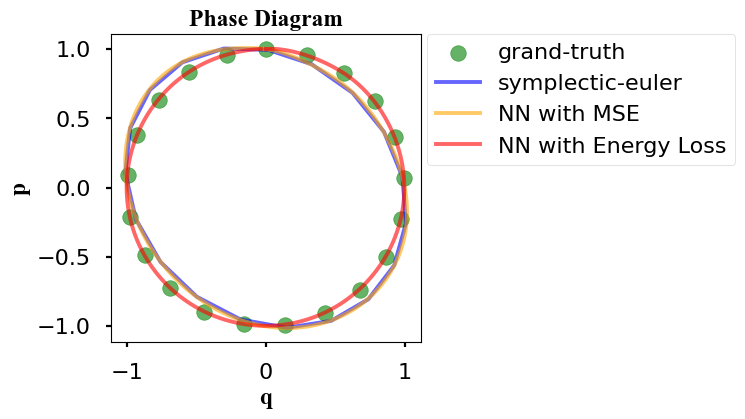

In [36]:
plt.figure(figsize = (4, 4))
plt.xlabel('q', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('p', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

test_t = np.arange(0,2*np.pi,0.01)
prediction_energy = ho_model.energy_model_train(test_t)
prediction_mse = ho_model.model_train(test_t)

# grand-truth
plt.scatter(tf.math.sin(np.arange(0.,2*np.pi,0.3)), tf.math.cos(np.arange(0.,2*np.pi,0.3)), c="green", alpha=0.6, label='grand-truth')
# symplectic euler
plt.plot(ho_model.z[:,0], ho_model.z[:,1], c="blue", alpha=0.6, label='symplectic-euler')
# NN with mse
plt.plot(prediction_mse[:,0], prediction_mse[:,1], c="orange", alpha=0.6, label='NN with MSE')
# NN with energy loss
plt.plot(prediction_energy[:,0], prediction_energy[:,1], c="red", alpha=0.6, label='NN with Energy Loss')
plt.legend(loc='upper right', bbox_to_anchor=(2.05,1.036))

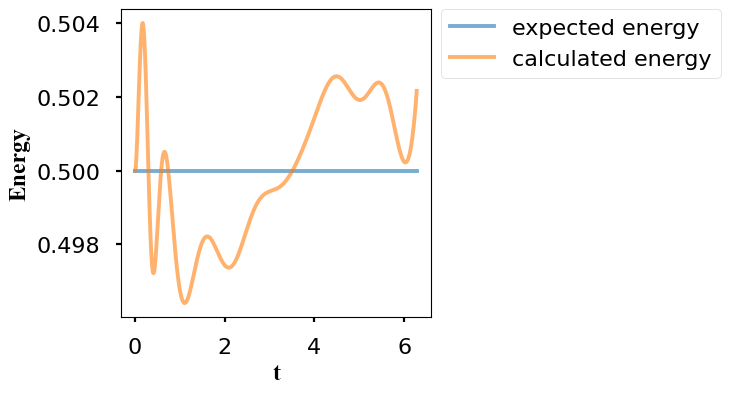

In [37]:
plt.figure(figsize = (4, 4))
plt.xlabel('t', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17,fontweight="bold",fontname="Times New Roman")

ho_energy = [ho_model.H(T, V, 1.0, 0.0) for i in np.linspace(0.,2*np.pi,20)]
ho_energy_new = ho_model.H(T, V, prediction_energy[:,0], prediction_energy[:,1])

plt.plot(np.linspace(0.,2*np.pi,20), ho_energy, alpha=0.6, label='expected energy')
plt.plot(test_t, ho_energy_new, alpha=0.6, label='calculated energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.97, 1.036))

In [41]:
# --------------------------------------------------Non-Linear Oscillator Example----------------------------------------------------

def T(p):
  return (p**2)/2

def V(q):
  return ((q**2)/2) + ((q**4)/4)

non_os_model = Hamiltonian(solver=symplectic_euler(T, V, initial_point=[1.3, 1.0], t_interval=[0., 4*np.math.pi], h=50), input_dim=1, output_dim=2,
              hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000, 
              batch_size=100000000, learning_rate=0.0002, h_for_t_created=0.001)

Epoch 1/2000
1/1 [==============================] - 1s 913ms/step - loss: 3.8549
Epoch 2/2000
1/1 [==============================] - 0s 18ms/step - loss: 3.3987
Epoch 3/2000
1/1 [==============================] - 0s 19ms/step - loss: 3.0368
Epoch 4/2000
1/1 [==============================] - 0s 17ms/step - loss: 2.7609
Epoch 5/2000
1/1 [==============================] - 0s 17ms/step - loss: 2.5569
Epoch 6/2000
1/1 [==============================] - 0s 17ms/step - loss: 2.4111
Epoch 7/2000
1/1 [==============================] - 0s 18ms/step - loss: 2.3127
Epoch 8/2000
1/1 [==============================] - 0s 19ms/step - loss: 2.2531
Epoch 9/2000
1/1 [==============================] - 0s 18ms/step - loss: 2.2241
Epoch 10/2000
1/1 [==============================] - 0s 20ms/step - loss: 2.2173
Epoch 11/2000
1/1 [==============================] - 0s 17ms/step - loss: 2.2241
Epoch 12/2000
1/1 [==============================] - 0s 18ms/step - loss: 2.2369
Epoch 13/2000
1/1 [=================

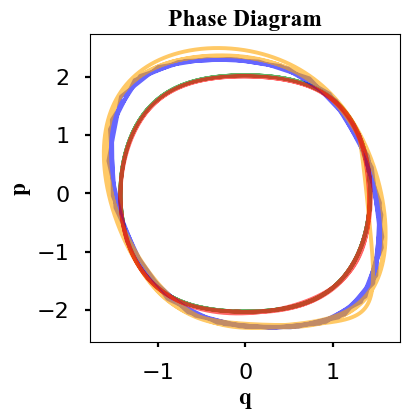

In [42]:
plt.figure(figsize = (4, 4))
plt.xlabel('q', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('p', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

non_os_test_t = np.arange(0., 4*np.math.pi, 0.001)
non_os_prediction_energy = non_os_model.energy_model_train(non_os_test_t)
non_os_prediction_mse = non_os_model.model_train(non_os_test_t)

# grand-truth
non_os_odeint_result = non_os_odeint(np.array([1.3,1.0]), t=np.arange(0., 4*np.pi, 0.01))
plt.plot(non_os_odeint_result[:,0], non_os_odeint_result[:,1], c="green", alpha=0.6)

# symplectic euler
plt.plot(non_os_model.z[:,0], non_os_model.z[:,1], c ="blue", alpha=0.6)
# NN with mse
plt.plot(non_os_prediction_mse[:,0], non_os_prediction_mse[:,1], c ="orange", alpha=0.6)
# NN with energy loss
plt.plot(non_os_prediction_energy[:,0], non_os_prediction_energy[:,1], c="red", alpha=0.6)

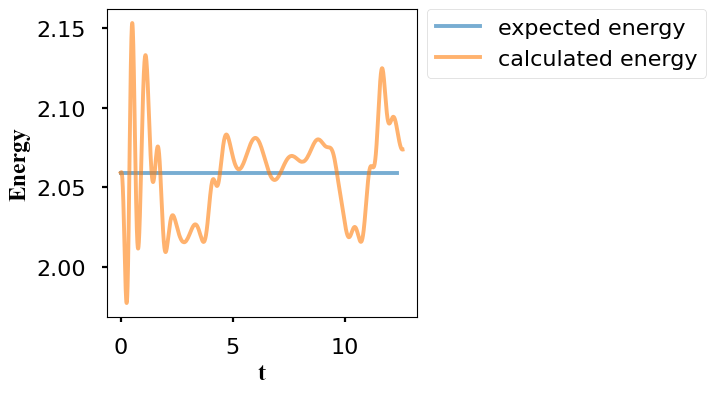

In [43]:
plt.figure(figsize = (4, 4))
plt.xlabel('t', fontsize=17, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17, fontweight="bold", fontname="Times New Roman")

non_energy = [non_os_model.H(T, V, 1.3, 1.0) for i in np.arange(0., 4 * np.pi, 0.3)]
non_energy_new = non_os_model.H(T, V, non_os_prediction_energy[:,0], non_os_prediction_energy[:,1])

plt.plot(np.arange(0., 4 * np.pi, 0.3), non_energy, alpha=0.6, label='expected energy')
plt.plot(non_os_test_t, non_energy_new, alpha=0.6, label='calculated energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.97, 1.036))

In [3]:
# --------------------------------------------------Lotka-Volterra Example----------------------------------------------------

# α = 2/3, β = 4/3, γ = 1 = δ. Assume x, y quantify thousands each. Circles represent prey and predator initial conditions from x = y = 0.9 to 1.8, in steps of 0.1. The fixed point is at (1, 1/2).
# q = ln(y), p = ln(x) 

def T(p):
  return tf.math.exp(p) - p

def V(q):
  return (4/3) * tf.math.exp(q) - (2/3) * q

lv_model = Hamiltonian(solver=symplectic_euler(T, V, initial_point=[-0.105, -0.105], t_interval=[0, 50], h=50), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=0.5)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.4044
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.3062
Epoch 3/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.2406
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.2034
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.1916
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.1965
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.2042
Epoch 8/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2068
Epoch 9/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2040
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.1983
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.1919
Epoch 12/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.1865
Epoch 13/2000
1/1 [====================

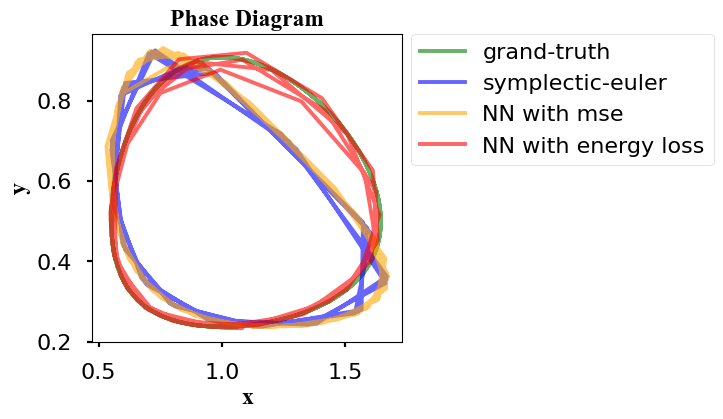

In [4]:
plt.figure(figsize = (4, 4))
plt.xlabel('x', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('y', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

lv_test_t = np.arange(0, 50, 0.5)
lv_prediction_energy = lv_model.energy_model_train(lv_test_t)
lv_prediction_mse = lv_model.model_train(lv_test_t)

# grand-truth
x, y = lotka_volterra(alpha=2/3, beta=4/3, delta=1., gamma=1., x0=0.9, y0=0.9, t_interval=[0,50], h=500)
plt.plot(x, y, c ="green", alpha=0.6, label='grand-truth')
# symplectic euler
plt.plot(np.exp(lv_model.z[:,1]), np.exp(lv_model.z[:,0]), c ="blue", alpha=0.6, label='symplectic-euler')
# NN with mse
plt.plot(np.exp(lv_prediction_mse[:,1]), np.exp(lv_prediction_mse[:,0]), c ="orange", alpha=0.6, label='NN with mse')
# NN with energy loss
plt.plot(np.exp(lv_prediction_energy[:,1]), np.exp(lv_prediction_energy[:,0]), c="red", alpha=0.6, label='NN with energy loss')
plt.legend(loc='upper right', bbox_to_anchor=(2.04, 1.036))

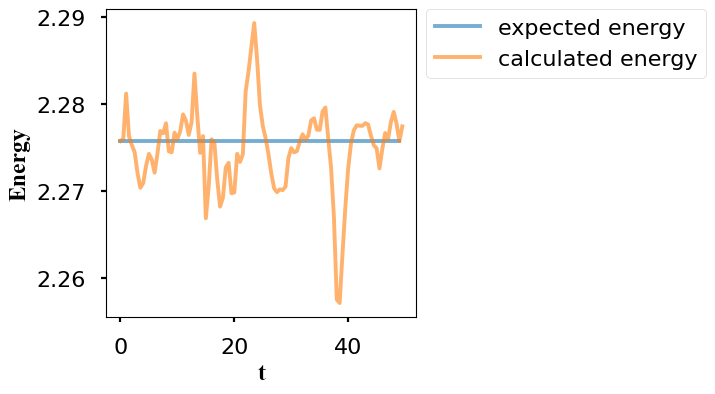

In [5]:
plt.figure(figsize = (4, 4))
plt.xlabel('t', fontsize=17, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17, fontweight="bold", fontname="Times New Roman")

lv_energy = [lv_model.H(T, V, -0.105, -0.105) for i in np.arange(0., 50., 1)]
lv_energy_new = lv_model.H(T, V, lv_prediction_energy[:,0], lv_prediction_energy[:,1])

plt.plot(np.arange(0., 50.0, 1), lv_energy, alpha=0.6, label='expected energy')
plt.plot(lv_test_t, lv_energy_new, alpha=0.6, label='calculated energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.97, 1.036))

In [21]:
# --------------------------------------------------Henon Heiles Example----------------------------------------------------
def T(px, py):
  return 0.5*(px**2 + py**2)

def V(x, y):
  return 0.5*(x**2 + y**2) + ((x**2)*y - (y**3)/3)

hh_model = hh_Hamiltonian(solver=henon_heiles_symplectic_euler(T, V, initial_point=[0.3, -0.3, 0.3, 0.15], t_interval=[0., 6*np.math.pi], h=200), 
                          input_dim=1, output_dim=4, hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000 ,batch_size=100000000,
                          learning_rate=0.0002, h_for_t_created=0.001)

Epoch 1/2000
1/1 [==============================] - 1s 915ms/step - loss: 0.2165
Epoch 2/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.1225
Epoch 3/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0832
Epoch 4/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0771
Epoch 5/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0806
Epoch 6/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0816
Epoch 7/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0793
Epoch 8/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0758
Epoch 9/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0730
Epoch 10/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.0712
Epoch 11/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0699
Epoch 12/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.0682
Epoch 13/2000
1/1 [=================

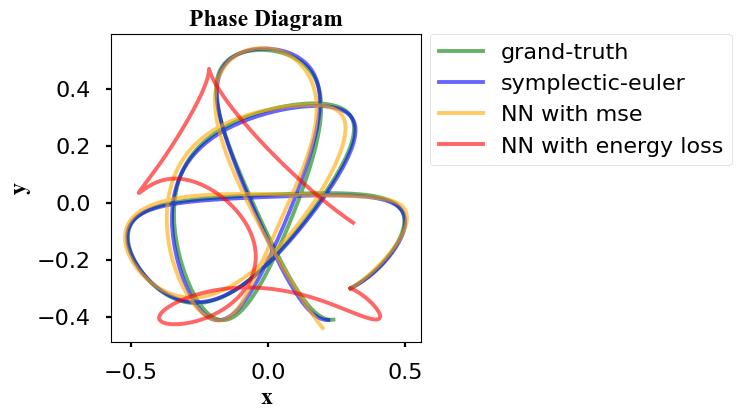

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('x', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('y', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

hh_test_t = np.arange(0, 6*np.math.pi, 0.001)
hh_prediction_energy = hh_model.energy_model_train(hh_test_t)
hh_prediction_mse = hh_model.model_train(hh_test_t)

# grand-truth
hh_result = hh_odeint(initial_point=[0.3, -0.3, 0.3, 0.15], t=[0., 6*np.math.pi], h=1500)
plt.plot(hh_result[:,0], hh_result[:,1], c ="green", alpha=0.6, label='grand-truth')

# symplectic euler
plt.plot(hh_model.z[:,0], hh_model.z[:,1], c ="blue", alpha=0.6, label='symplectic-euler')

# NN with mse
plt.plot(hh_prediction_mse[:,0], hh_prediction_mse[:,1], c ="orange", alpha=0.6, label='NN with mse')

# NN with energy loss
plt.plot(hh_prediction_energy[:,0], hh_prediction_energy[:,1], c="red", alpha=0.6, label='NN with energy loss')
plt.legend(loc='upper right', bbox_to_anchor=(2.04, 1.036))

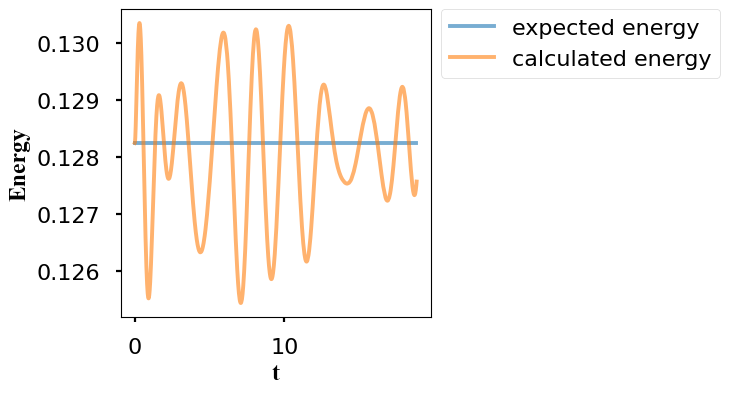

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('t', fontsize=17, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17, fontweight="bold", fontname="Times New Roman")

non_energy = [hh_model.H(T, V, 0.3, -0.3, 0.3, 0.15) for i in np.arange(0., 6*np.math.pi, 0.1)]
non_energy_new = hh_model.H(T, V, hh_prediction_energy[:,0], hh_prediction_energy[:,1], hh_prediction_energy[:,2], hh_prediction_energy[:,3])

plt.plot(np.arange(0., 6*np.math.pi, 0.1), non_energy, alpha=0.6, label='expected energy')
plt.plot(hh_test_t, non_energy_new, alpha=0.6, label='calculated energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.97, 1.036))